In [3]:
#experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../project/processed_data_with_timeindex.csv',index_col = [0])
data.index = pd.to_datetime(data.index)


In [7]:
# clustering by daily load pattern
# compute average daily pattern
daily_pattern = pd.DataFrame(columns = data.columns)
for i in data.columns:
    daily_pattern[i] = np.nanmean(np.array(data[i][:(data.shape[0] - data.shape[0]%(60*24))]).reshape(-1,24*60),axis = 0)

In [8]:
daily_pattern = daily_pattern.loc[:,daily_pattern.columns[daily_pattern.std(0)!=0]]

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# plot elbow plot
def elbow_plot(X,n_clusters = np.arange(1,40,2)):
    distortions = []
    for n in n_clusters:
        kmmodel = KMeans(n)
        kmmodel.fit(X.T)
        distortions.append(sum(np.min(cdist(X.T, kmmodel.cluster_centers_, 'euclidean'), axis=1)) / X.T.shape[0])
    plt.plot(n_clusters, distortions, 'bx-')
    plt.xticks(n_clusters)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')

In [22]:
import pickle
def labeled_plot(X,k=31,xnum=4,ynum=8,silent = True):
    '''
    k should <= xnum*ynum
    '''
    X = X.reset_index(drop = True)
    kmmodel = KMeans(k)
    kmmodel.fit(X.T)
    clusters_dict = {label:0 for label in set(kmmodel.labels_)}
    for i in kmmodel.labels_:
        clusters_dict[i] += 1
    count = pd.DataFrame(clusters_dict,index = ['count']).T.sort_values(by = 'count',ascending = False)
    clusters_dict = {label:0 for label in count.index}
    for label in count.index:
        clusters_dict[label] = X.iloc[:,kmmodel.labels_ == label]
    if not silent:
        fig = plt.figure(figsize=(20,8))
        for k,label in enumerate(count.index):
            fig.add_subplot(xnum,ynum,k+1).plot(clusters_dict[label]+0.5,alpha = 0.06)
#             plt.subplot(xnum,ynum,k+1).plot(clusters_dict[label].mean(1),'r')
            plt.plot(clusters_dict[label].mean(1)+0.5,'r')
    return clusters_dict
def save_dict(cluster_dicts, file_name):
    with open(file_name,'wb+') as f:
        pickle.dump(clusters_dict,f)
def resample_normalization(data,granularity = '1min'):
    data.index = pd.date_range('2016-01-01-00:00:00','2016-01-01-23:59:59',freq = 'min')
    data = data.resample(granularity,label = 'left').mean()
    data = (data - data.min(0))/(data.max(0) - data.min(0)) - 0.5
    return data

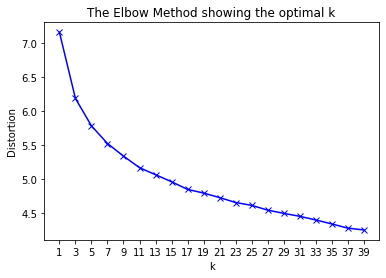

In [11]:
elbow_plot(resample_normalization(daily_pattern,'1min'),n_clusters = np.arange(1,40,2))

113
73
67
51
38


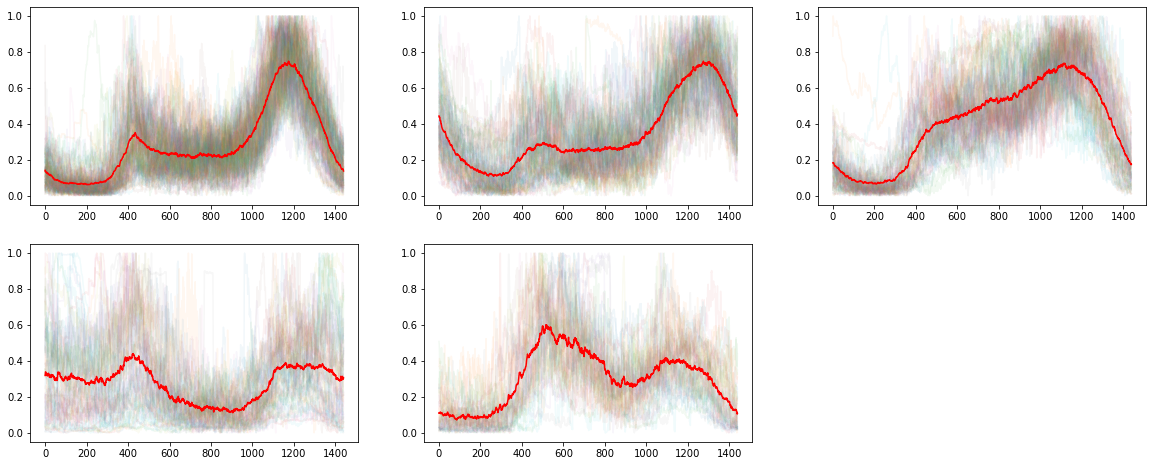

In [28]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),5,2,3,silent = False)
for val in clusters_dict.values():
    print(val.shape[1])

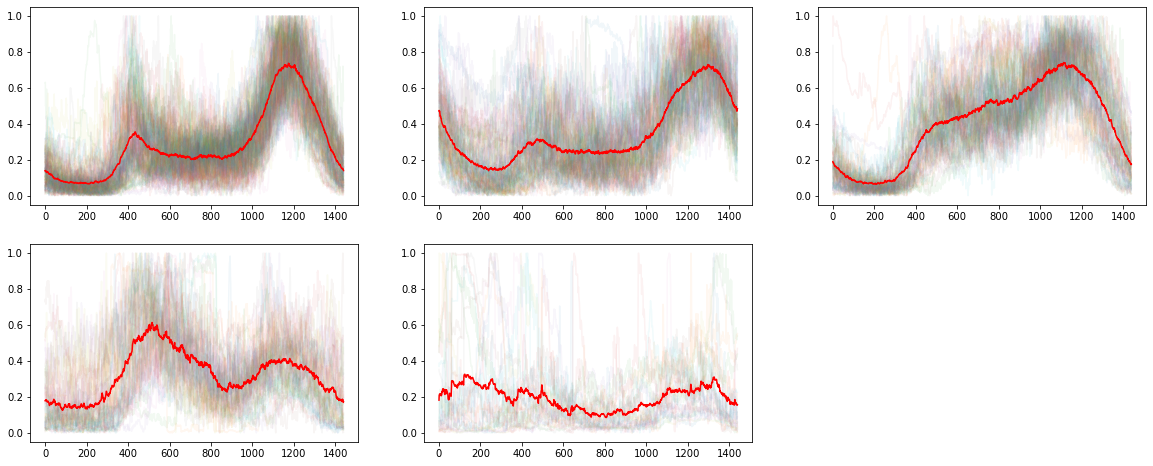

In [23]:
# granularity 1min 31 clusters
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),5,2,3,silent = False)

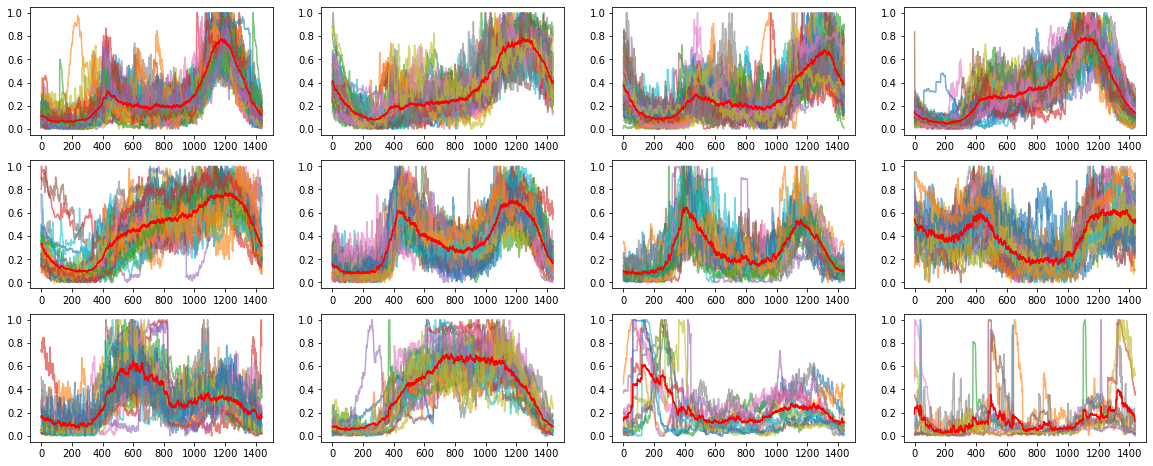

In [18]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),12,3,4,silent = False)

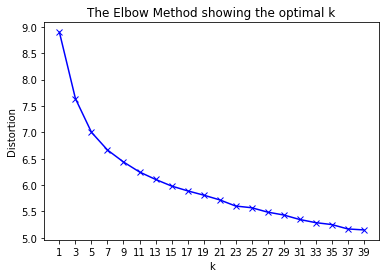

In [122]:
elbow_plot(resample_normalization(daily_pattern,'10min'),n_clusters = np.arange(1,40,2))

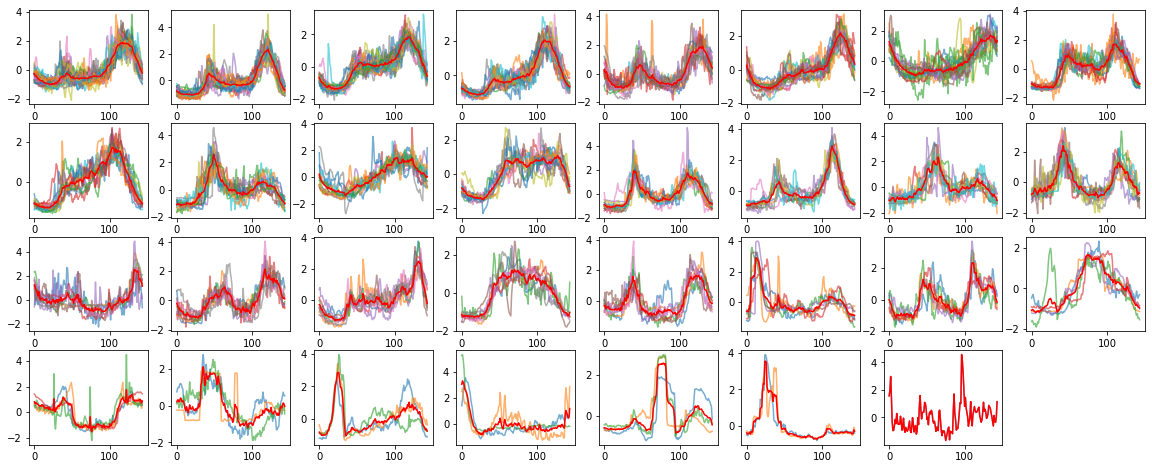

In [124]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),31,4,8,silent = False)

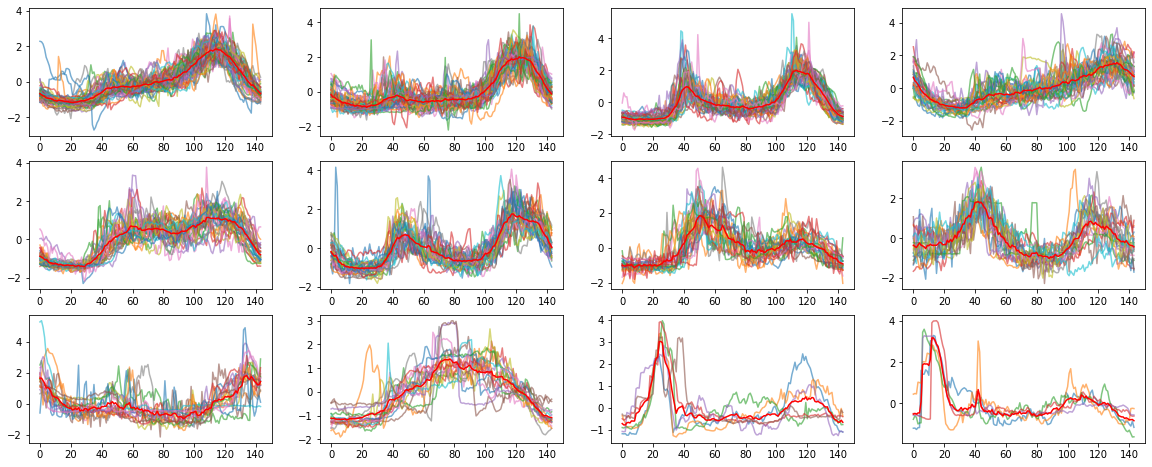

In [123]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),12,3,4,silent = False)

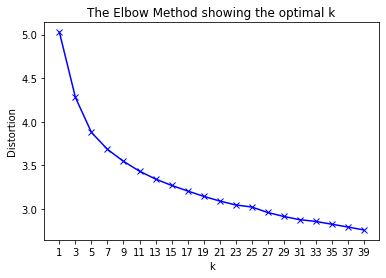

In [127]:
elbow_plot(resample_normalization(daily_pattern,'30min'),n_clusters = np.arange(1,40,2))

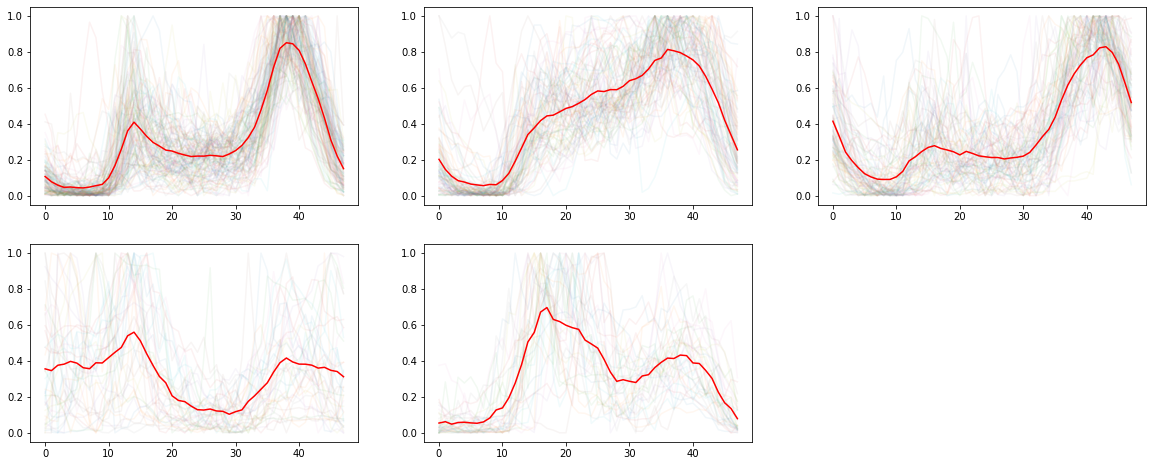

In [29]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'30min'),5,2,3,silent = False)

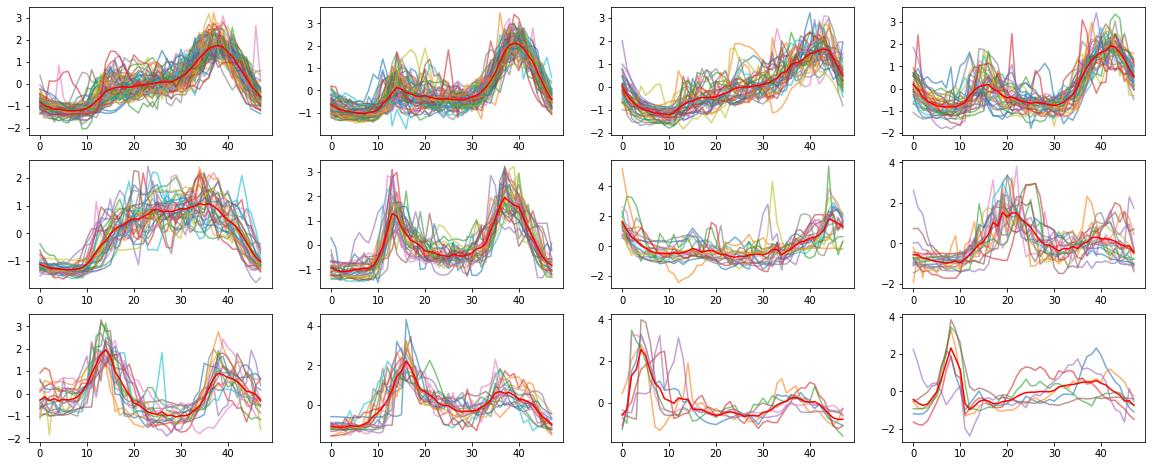

In [128]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'30min'),12,3,4,silent = False)

In [54]:
import pickle
with open('kmeans_granuity_1min.pkg','wb+') as f:
    pickle.dump(clusters_dict,f)